In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
vacs = pd.read_csv('../vacs_metrics.csv')
vacs.head()

,vacancy_id_conv,metric_full,emplpyer_id
0,1,5.250818,640
1,2,5.808587,5123
2,3,2.830297,3325
3,4,5.179469,3511
4,5,5.457955,6604


Таблица с метрикой-скор для каждой вакансии
1. vacancy_id_conv — идентификатор вакансии
2. metrics_full — метрика
3. emplpyer_id - компания, работодатель?

In [5]:
vacs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   vacancy_id_conv  55500 non-null  int64  
 1   metric_full      55500 non-null  float64
 2   emplpyer_id      55500 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 MB


In [7]:
vacs.describe()

,vacancy_id_conv,metric_full,emplpyer_id
count,55500.000000,55500.000000,55500.000000
mean,28750.169694,4.393625,4994.316342
std,16711.462112,1.430828,2882.736532
min,1.000000,-2.259488,0.000000
25%,14281.750000,3.609140,2485.000000
50%,28660.500000,4.562120,4994.000000
75%,43149.250000,5.372227,7469.000000
max,58346.000000,8.949871,9999.000000


Отрицательные значения метрики?

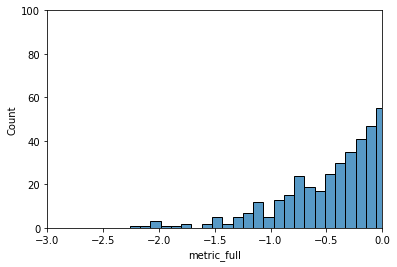

In [17]:
plt.xlim([-3, 0])
plt.ylim([0, 100])
sns.histplot(vacs.metric_full);

Многочислены, распределены более-менее "равномерно". Не похоже на баг. Фича?

In [21]:
vacs.nunique()

vacancy_id_conv    55500
metric_full        55500
emplpyer_id         9961
dtype: int64

ни разу значение метрики не совпало. Округлений не было.

In [4]:
serps = pd.read_csv('../serps.csv')
serps.head()

,request_id,vacancy_id_conv,city,applicant
0,168719525526659303f2dee867dc6eda,48019,Moscow,78076
1,168719525526659303f2dee867dc6eda,45120,Moscow,614859
2,168719525526659303f2dee867dc6eda,18132,Moscow,175212
3,168719525526659303f2dee867dc6eda,29942,Moscow,322643
4,168719525526659303f2dee867dc6eda,32658,Moscow,722260


Таблица поисковых выдач
1. request_id — идентификатор serp’а
2. vacancy_id_conv  — идентификатор вакансии
3. city — город пользователя, в котором он ищет работу.
4. applicant - соискатель?

In [6]:
serps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431596 entries, 0 to 2431595
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   request_id       object
 1   vacancy_id_conv  int64 
 2   city             object
 3   applicant        int64 
dtypes: int64(2), object(2)
memory usage: 74.2+ MB


In [18]:
serps.describe()

,vacancy_id_conv,applicant
count,2.431596e+06,2.431596e+06
mean,2.414411e+04,4.999815e+05
std,1.534930e+04,2.885768e+05
min,1.000000e+00,0.000000e+00
25%,1.171500e+04,2.501980e+05
50%,2.179800e+04,4.999010e+05
75%,3.592200e+04,7.497200e+05
max,5.834600e+04,9.999990e+05


In [19]:
serps.describe(include='object')

,request_id,city
count,2431596,2431596
unique,1000000,5
top,1687172902251a1750dec6b693a56090,Moscow
freq,50,785767


In [20]:
serps.nunique()

request_id         1000000
vacancy_id_conv      55500
city                     5
applicant           911862
dtype: int64